## Importando as bibliotecas que serão utilizadas

In [ ]:
import os  # arquivos
#import warnings  #avisos
import pandas as pd  # para manipular a base de dados
import re #manipular strings

import nltk
from nltk.corpus import stopwords  
from nltk.tokenize import sent_tokenize, word_tokenize # frases e palavras do texto
from nltk import pos_tag

from google.colab import files
import matplotlib.pyplot as plt 
% matplotlib inline

from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
from wordcloud import STOPWORDS

In [ ]:
# Conectando com o google drive
from google.colab import drive
drive.mount('/content/drive')
!ls '/content/drive/My Drive/TCC'
%cd '/content/drive/My Drive/TCC'

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

## Compreensão dos dados

Os dados foram extraídos do site do Governo Federal, por intermedio do software RStudio. \

A tabela coletada no RStudio fornece as seguintes colunas:

- **Ind**: índice para cada discurso;
- **DataHora**: Data e hora dos discursos;
- **Titulo**: título do discurso proferido pelo presidente;
- **Texto**: transcrição do discursos proferidos pelo presidente.

In [ ]:
df = pd.read_excel("Discursos.xlsx")   #Lendo base de discursos
df.rename(columns={'Unnamed: 0': 'Ind'}, inplace = True)
df.head()

,Ind,DataHora,Titulo,Texto
0,1,15/10/2021 14h42,"Discurso do Presidente da República, Jair Bols...",(...). Eu amo Israel.\nAgradeço a Deus pela mi...
1,2,13/10/2021 17h05,"Discurso do Presidente da República, Jair Bols...","Miracatu/SP, 13 de outubro de 2021\n\nBom dia ..."
2,3,09/10/2021 16h48,"Discurso do Presidente da República, Jair Bols...",É uma satisfação mais uma vez voltar a esse am...
3,4,07/10/2021 22h14,"Discurso do Presidente da República, Jair Bols...",Boa tarde a todos a gente se pergunta como é q...
4,5,06/10/2021 19h51,"Discurso do Presidente da República, Jair Bols...","Boa tarde a todos, tô me sentindo 40 anos mais..."


## Análise dos Dados

Será realizada uma análise do comprimento dos discursos, ou seja, da quantidade de palavras em cada discursos antes e depois da limpeza, realizada com técnicas de processamento de linguagem natural. 

count     456.000000
mean      928.971491
std       735.089742
min        60.000000
25%       456.750000
50%       741.500000
75%      1121.500000
max      5353.000000
Name: Texto, dtype: float64


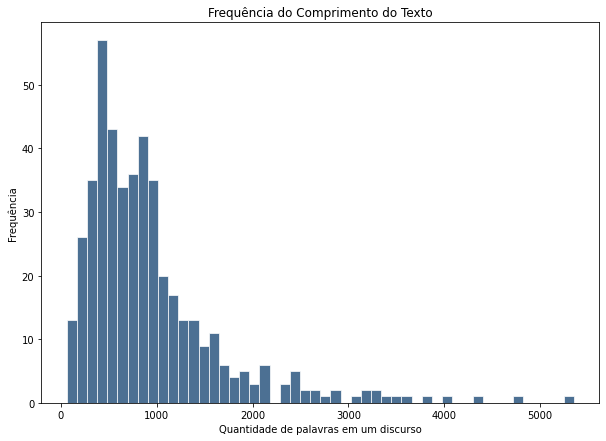

In [ ]:
lens = df.Texto.str.split().apply(lambda x: len(x)) # Quantidade de palavras no texto
import matplotlib.pyplot as plt
print(lens.describe()) 
fig = plt.figure(figsize =(10, 7))
plt.title('Frequência do Comprimento do Texto')
plt.xlabel('Quantidade de palavras em um discurso')
plt.ylabel('Frequência')
plt.hist(lens, 50, color='#003366', alpha=0.7,edgecolor='white')
plt.show()

Foram coletados 456 discursos, em que a média do comprimentos dos discursos é 928.9 palavras, a quantidade mínima foi 63 palavras e a quantidade máxima foi 5353 palavras. 50% dos discursos apresentaram 741.5 palavras.

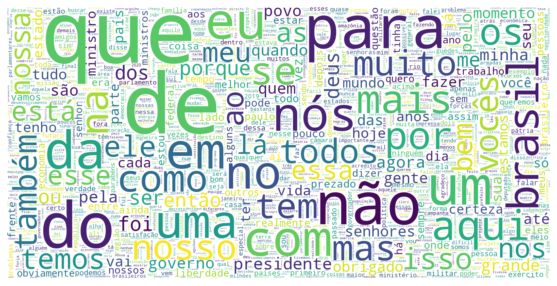

In [ ]:
# Frequencia do termo 

co = CountVectorizer()
counts = co.fit_transform(df.Texto)
palavras1 = pd.DataFrame(counts.sum(axis=0),columns=co.get_feature_names()).T.sort_values(0,ascending=False)
palavras1 = palavras1.reset_index().rename(columns = {'index':'Nome',0:'Qtd'})

data = dict(zip(palavras1['Nome'].tolist(), palavras1['Qtd'].tolist()))
wc = WordCloud(background_color="white", max_words=2000,
               max_font_size=256,
               random_state=42, width=1600, height=800)
wc.generate_from_frequencies(data)

plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation="bilinear")
plt.savefig("antes_Wc.png")
plt.axis('off')
plt.show()

Para remover essas stop words foi necessário criar uma lista de stop words utilizando a lista de todas as palavras dos discursos coletados. Foram consideradas como stop words 8953 palavras que são pronomes, preposições, advérbios, verbos e artigos, além de nomes próprios e palavras com comprimento menor ou igual a 2.

In [ ]:
stopwords = nltk.corpus.stopwords.words('portuguese')
df_stop = pd.read_excel("estudo_variaveis2.xlsx")   #Lista de stopwords personalizada dos 
palavras = list(set(df_stop['Lista'].to_list()))
stopwords.extend(palavras) # adicionando lista de palavras as stopwords

A função abaixo retira os espaços em branco duplos, do início e do final, coloca as palavras em caixa baixa (minúsculas), filtra somente palavras do texto (retirando números e códigos). Após esse processo, retira as stop words, filtra somente substantivos e palavra com mais de 3 letras. 

In [ ]:
def clean_text(text): 
  text = text.strip() #tira os espaços em branco duplos, do início e do final
  text = text.lower() #colocar em minusculo
  text = re.sub(r"[^a-zA-ZáàâãéèêíïóôõöúçñÁÀÂÃÉÈÍÏÓÔÕÖÚÇÑ]", " ", text) #deixa somente palavras no texto
  lista = word_tokenize(text) #separa o texto em palavras
  lista = [palavra for palavra in lista if palavra not in stopwords] #tira as stopwords
  lista = [token for token, pos in pos_tag(lista) if lambda pos: pos[:2] == 'NN'] # deixa somente substantivos
  lista = [palavra for palavra in lista if len(palavra) >= 3] # deixa palavras com 3 ou mais letras
  #return lista
  return  ' '.join(lista)
df['Texto_Limpo'] = df.apply(lambda x: clean_text(x['Texto']),axis=1)

Após o pré-processamento, os discursos coletados apresentam uma diminuição na quantidade de palavras, ficando apenas palavras que carregam um valor semântico. A média dos comprimentos do texto é 195.89 palavras, a quantidade mínima foi 13 palavras e a quantidade máxima foi 1400 palavras. 50% dos discursos apresentaram 152.5 palavras.

count     456.000000
mean      195.894737
std       160.948309
min        13.000000
25%        90.000000
50%       152.500000
75%       239.000000
max      1400.000000
Name: Texto_Limpo, dtype: float64


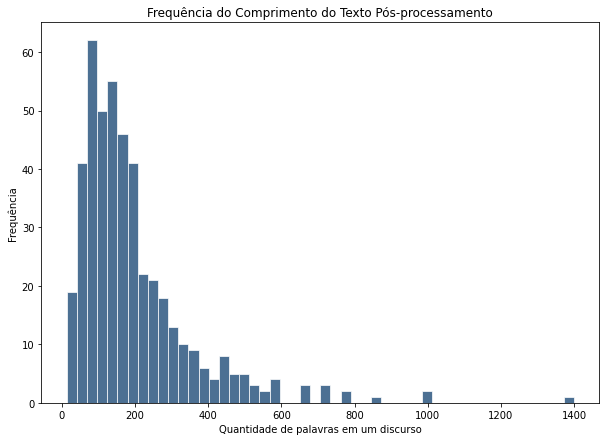

In [ ]:
lens = df.Texto_Limpo.str.split().apply(lambda x: len(x)) # Quantidade de palavras no texto
print(lens.describe()) 

fig = plt.figure(figsize =(10, 7))
plt.title('Frequência do Comprimento do Texto Pós-processamento')
plt.xlabel('Quantidade de palavras em um discurso')
plt.ylabel('Frequência')
plt.hist(lens, 50, color='#003366', alpha=0.7,edgecolor='white')
plt.show()

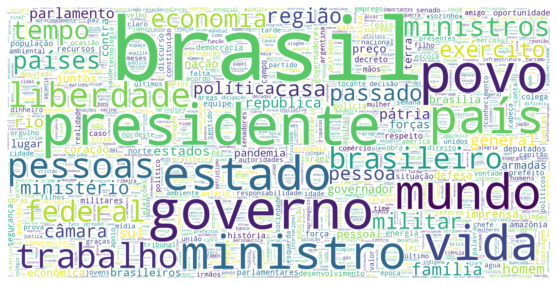

In [ ]:
# Frequencia do termo 
from sklearn.feature_extraction.text import CountVectorizer
co = CountVectorizer()
counts = co.fit_transform(df.Texto_Limpo)
palavras = pd.DataFrame(counts.sum(axis=0),columns=co.get_feature_names()).T.sort_values(0,ascending=False)
palavras = palavras.reset_index().rename(columns = {'index':'Nome',0:'Qtd'})

data = dict(zip(palavras['Nome'].tolist(), palavras['Qtd'].tolist()))
wc = WordCloud(background_color="white", max_words=2000,
               max_font_size=256,
               random_state=42, width=1600, height=800)
wc.generate_from_frequencies(data)

plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation="bilinear")
plt.savefig("depois_Wc.png")
plt.axis('off')
plt.show()